# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Juanwen Zhang
*   **Student number**: 1002247017



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [2]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

In [5]:
df = cases_raw
df.shape

(193, 511)

In [ ]:
df.T

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,US,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11,87716,132437,132727,13813,36455,1263,4093090,223555,30234,648187,335065,12092,256921,822849,4033,403845,1074988,12938,8109,1789,400047,204597,59480,17296118,248,420213,13456,145064,4975,31512,37321,80090,1407304,7101,4942,1461419,103320,3694707,3894,12026,...,714634,12973,4312,62245,390893,256224,20,14779,1730106,10688,3733600,218366,36203,17799,1083456,700051,24767,12500,13308,509,189828,8145,13597,28106,364819,5319359,58515,2281303,593894,4566893,333484,33449000,102892,4,248820,10048,311018,6856,107974,39688
2021-06-12,88740,132449,133070,13813,36600,1263,4111147,223643,30248,648387,335126,12092,257852,824486,4036,404740,1075765,12938,8109,1808,405347,204597,59480,17374818,248,420294,13459,145230,4995,31571,37959,80090,1408490,7101,4942,1468992,103357,3724705,3899,12121,...,714753,12973,4349,62263,390984,256352,20,14779,1739425,10688,3733600,221277,36203,18110,1083456,700051,24789,12746,13308,509,193105,8228,13597,28422,367047,5325435,60250,2282727,596017,4574445,336470,33457207,103206,4,250309,10337,311018,6857,110332,39852
2021-06-13,89861,132459,133388,13813,36705,1263,4124190,223682,30262,648620,335171,12092,258731,826922,4036,405663,1076338,12938,8109,1813,406954,204597,59480,17412766,248,420336,13459,145603,5013,31571,38427,80090,1409496,7101,4942,1476473,103380,3753224,3899,12121,...,714891,12973,4388,62276,391026,256443,20,14817,1747082,10688,3733600,223638,36203,18372,1083456,700051,24814,12921,13308,509,195909,8285,13627,28723,368908,5330447,61977,2283746,597986,4581779,338513,33461982,103510,4,251686,10630,311534,6862,111746,39959
2021-06-14,91458,132461,133742,13826,36790,1263,4145482,223723,30273,648732,335196,12199,259523,829972,4037,406360,1076579,12971,8109,1826,409106,204668,61457,17452612,248,420493,13459,145826,5026,31647,38969,80090,1410828,7101,4943,1482663,103401,3777600,3901,12121,...,715015,13630,4433,62301,391038,256467,20,14817,1752630,10688,3741767,225922,36304,18599,1083456,700735,24860,13106,13308,509,199264,8341,1363

In [6]:
country = df.loc[["US", "China", "Canada"]]
country_t = country.T
print(country_t)

Country           US   China   Canada
2020-01-22         1     548        0
2020-01-23         1     643        0
2020-01-24         2     920        0
2020-01-25         2    1406        0
2020-01-26         5    2075        1
...              ...     ...      ...
2021-06-11  33449000  103320  1407304
2021-06-12  33457207  103357  1408490
2021-06-13  33461982  103380  1409496
2021-06-14  33474734  103401  1410828
2021-06-15  33485068  103424  1411652

[511 rows x 3 columns]


In [7]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plotfunction(dataframe, country_list):
  dataframe_t = dataframe.T
  #index = dataframe_t.columns.get_loc("China")
  rcParams["figure.figsize"] = 14, 6
  for i in country_list:
    plt.plot(dataframe_t[i], "ro")
    plt.grid(True)
    plt.xlabel(i)
    plt.show()

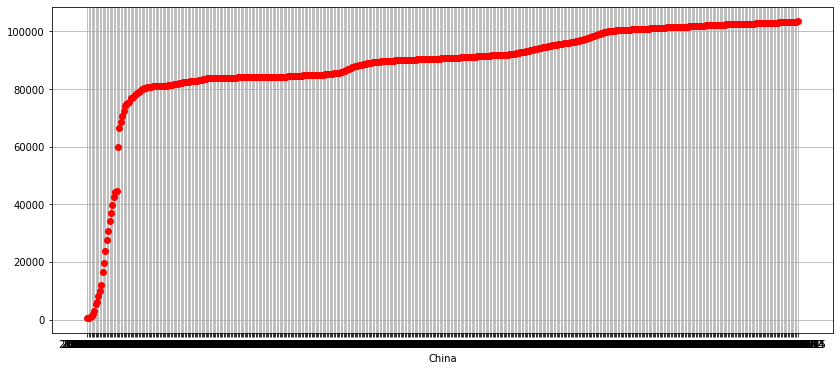

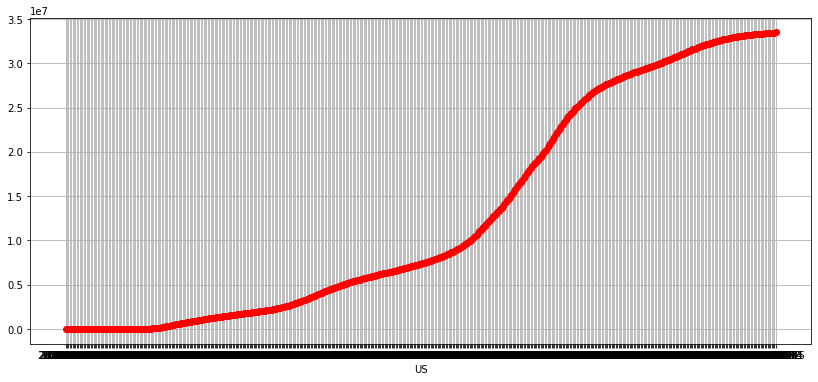

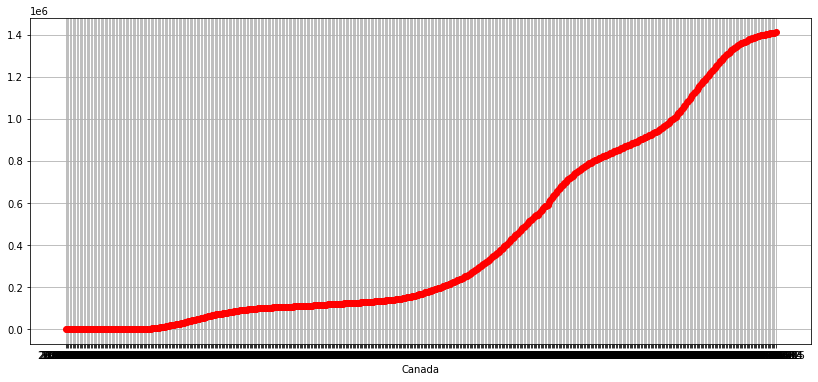

In [8]:
country_list = ["China", "US", "Canada"]
plotfunction (df, country_list)

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_standard = scalar.fit_transform(df)
print(data_standard.mean())
print(data_standard.std())

-9.00579398010733e-19
1.0


In [11]:
df_standard = pd.DataFrame(data_standard, index = df.index, columns = df.columns)
df_standard_t = df_standard.T
df_standard_t

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,US,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,13.855883,-0.073358,-0.073358,-0.073358,...,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.047939,-0.073358,-0.073358,0.028316,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.047939,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358,-0.073358
2020-01-23,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,13.855947,-0.073520,-0.073520,-0.073520,...,-0.073520,-0.073520,-0.073520,-0.051857,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.051857,-0.073520,-0.073520,0.013133,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.073520,-0.051857,-0.073520,-0.073520,-0.073520,-0.030194,-0.073520,-0.073520,-0.073520,-0.073520
2020-01-24,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,13.855907,-0.073822,-0.073822,-0.073822,...,-0.073822,-0.073822,-0.073822,-0.028399,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.028399,-0.073822,-0.073822,0.001883,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.073822,-0.043540,-0.073822,-0.073822,-0.073822,-0.043540,-0.073822,-0.073822,-0.073822,-0.073822
2020-01-25,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,13.856106,-0.073560,-0.073560,-0.073560,...,-0.073560,-0.073560,-0.073560,-0.043839,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.043839,-0.073560,-0.073560,-0.014117,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.073560,-0.053746,-0.073560,-0.073560,-0.073560,-

In [ ]:
df_standard_t.iloc[:, 0]

2020-01-22   -0.073358
2020-01-23   -0.073520
2020-01-24   -0.073822
2020-01-25   -0.073560
2020-01-26   -0.073671
                ...   
2021-06-11   -0.233966
2021-06-12   -0.233815
2021-06-13   -0.233642
2021-06-14   -0.233340
2021-06-15   -0.233002
Name: Afghanistan, Length: 511, dtype: float64

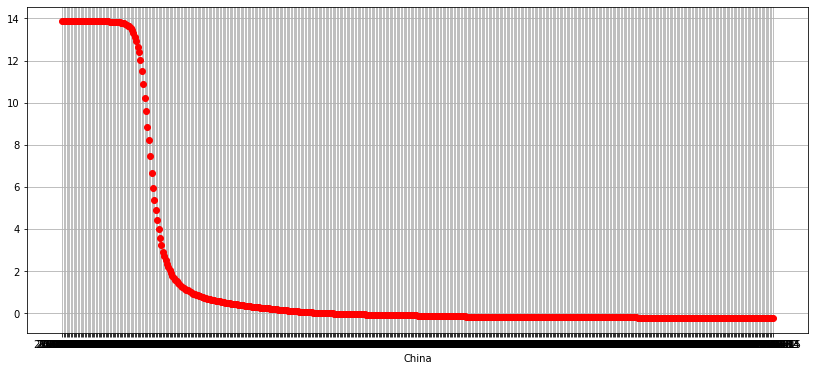

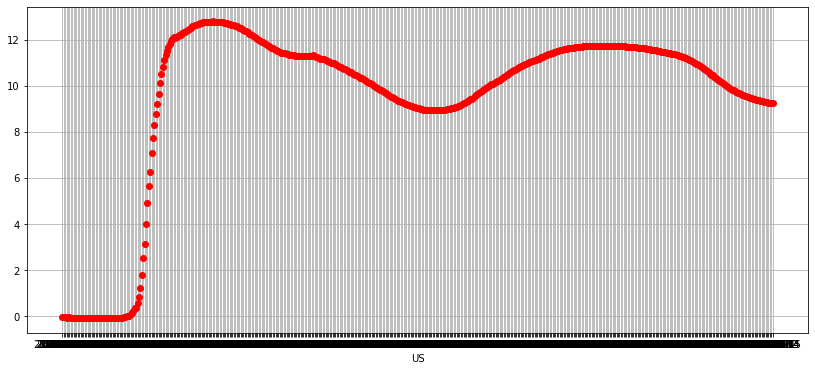

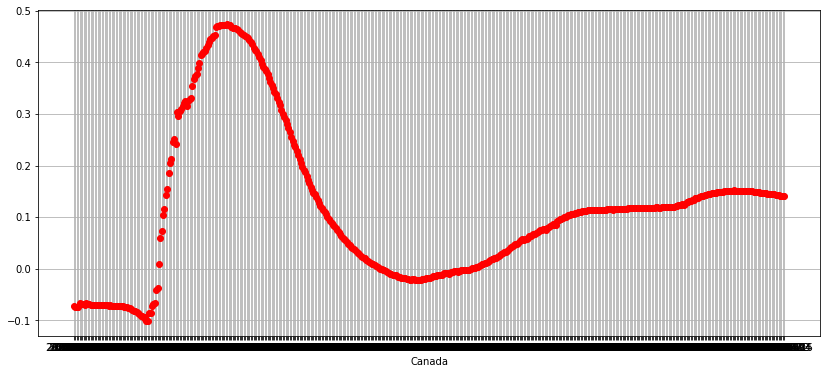

In [12]:
country_list = ["China", "US", "Canada"]
plotfunction (df_standard, country_list)

Since the mean and standard deviation are calculated over all countries, the standardized time-series represents how the country's cumulative number of cases compares with the rest of the countries. Sign of values indicates the country's cases numbers are above or below the average of all countries.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [13]:
df_covmatrix = df.cov()
df_covmatrix.shape

(511, 511)

In [14]:
def get_sorted_eigen(df_cov):
  eigenValues, eigenVectors = np.linalg.eigh(df_cov) 
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]
  return eigenValues, eigenVectors

eigenValues, eigenVectors = get_sorted_eigen(df_covmatrix)

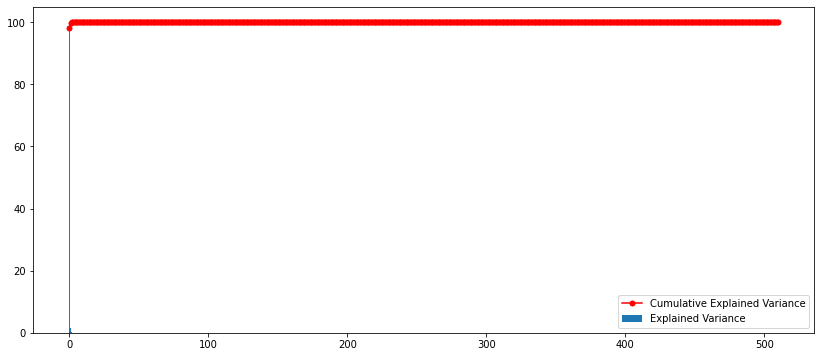

In [15]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
plt.bar(range(511), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', markersize = 5, label='Cumulative Explained Variance')
plt.legend()
plt.show()


In [ ]:
cumExpVar

array([ 98.12606641,  99.75966146,  99.91098411,  99.968585  ,
        99.9858496 ,  99.99251494,  99.99579414,  99.99730067,
        99.99817694,  99.9988332 ,  99.99924436,  99.99949433,
        99.99966171,  99.99975026,  99.99982619,  99.99987821,
        99.99990582,  99.99993079,  99.99995352,  99.99996359,
        99.99997272,  99.99997713,  99.99998136,  99.99998428,
        99.99998701,  99.99998882,  99.99999035,  99.9999917 ,
        99.99999284,  99.99999379,  99.99999462,  99.99999534,
        99.99999598,  99.99999642,  99.99999682,  99.99999718,
        99.99999748,  99.99999778,  99.999998  ,  99.99999819,
        99.99999836,  99.9999985 ,  99.99999863,  99.99999876,
        99.99999886,  99.99999896,  99.99999905,  99.99999913,
        99.9999992 ,  99.99999927,  99.99999932,  99.99999937,
        99.99999942,  99.99999947,  99.99999951,  99.99999954,
        99.99999958,  99.99999961,  99.99999963,  99.99999966,
        99.99999969,  99.99999971,  99.99999973,  99.99

Only 2 PCA is needed to cover 99% of dataset's variance

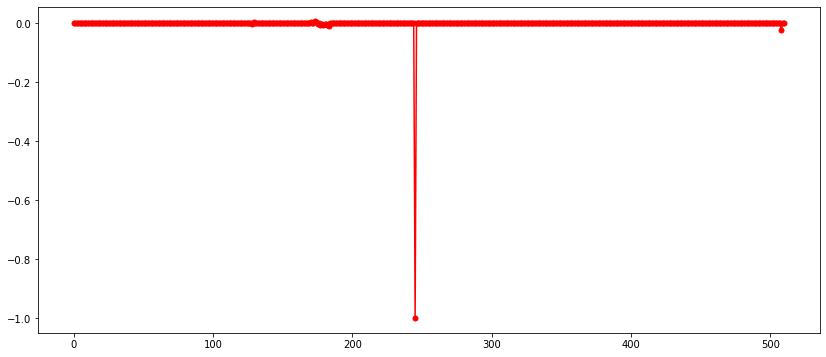

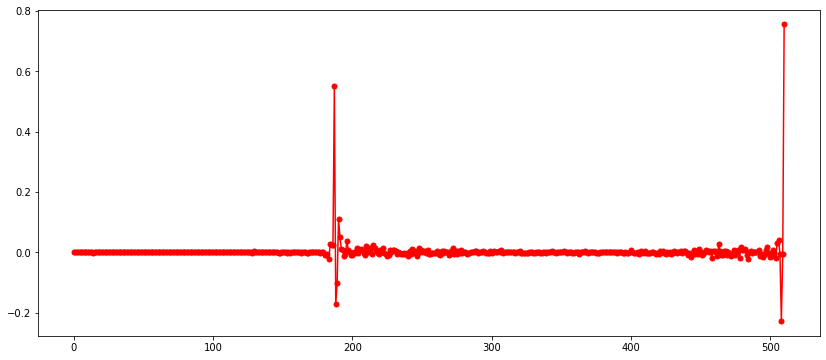

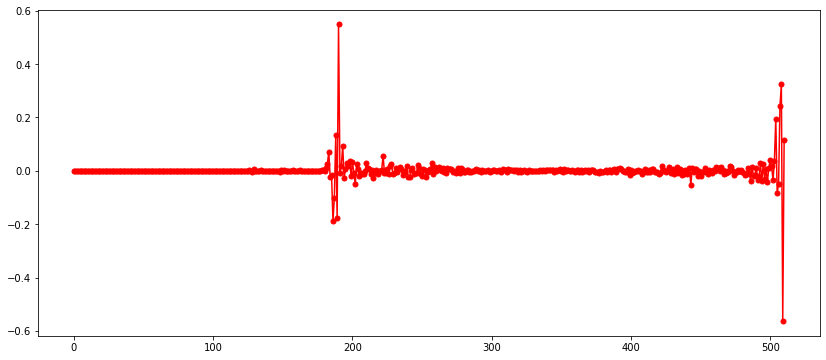

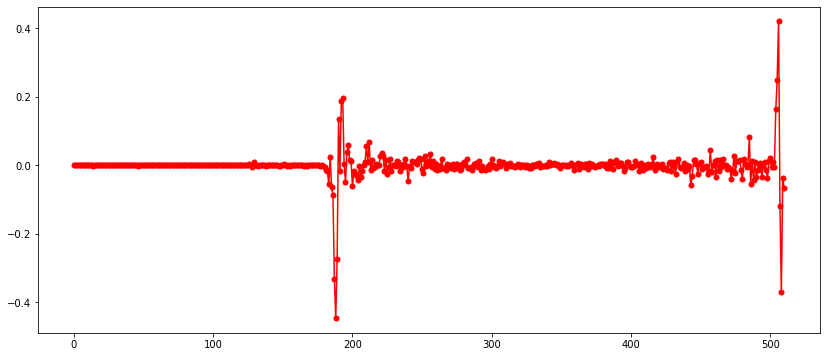

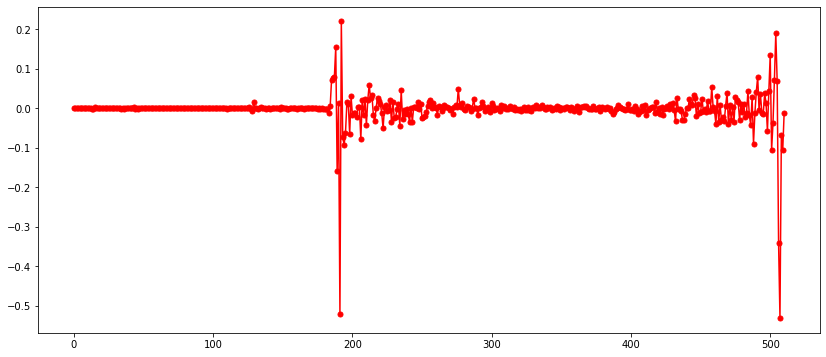

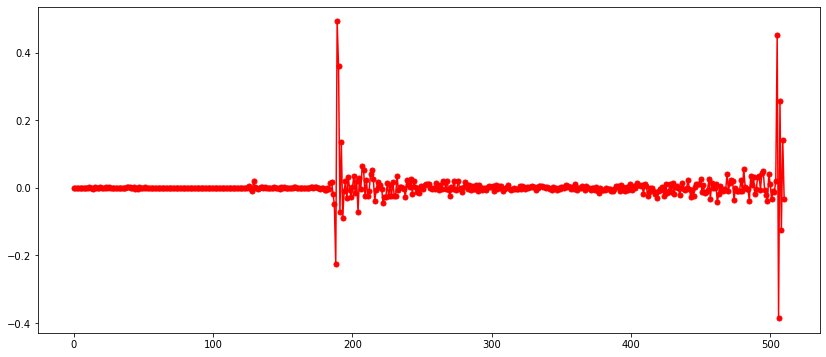

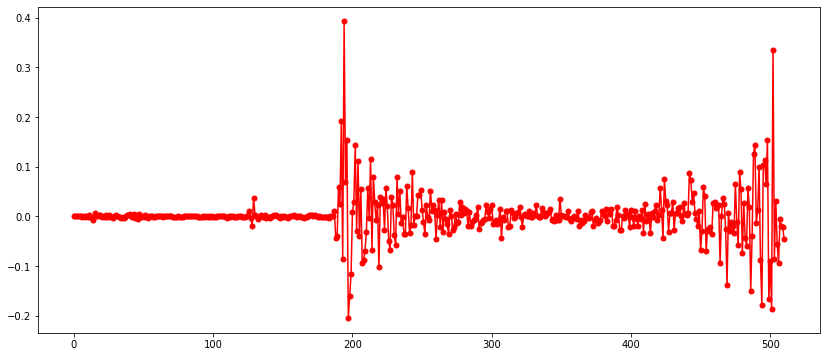

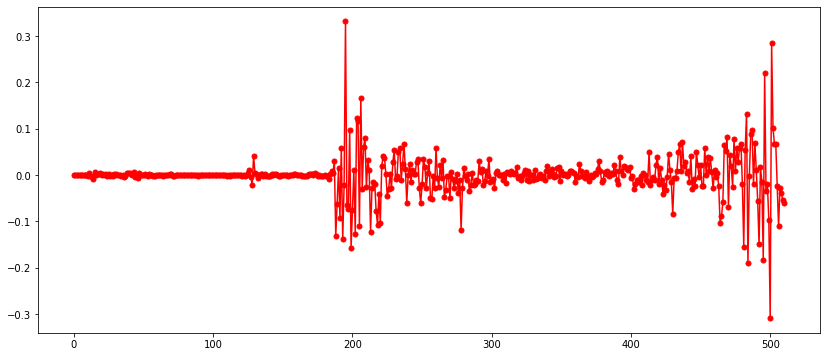

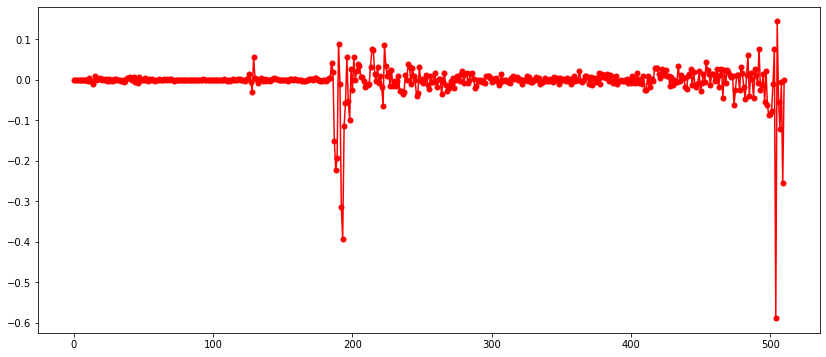

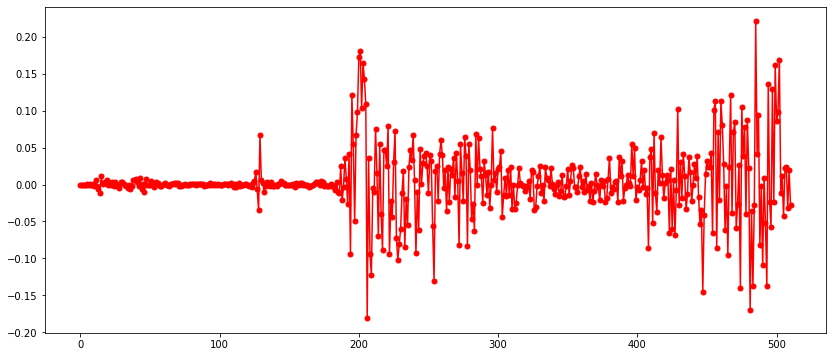

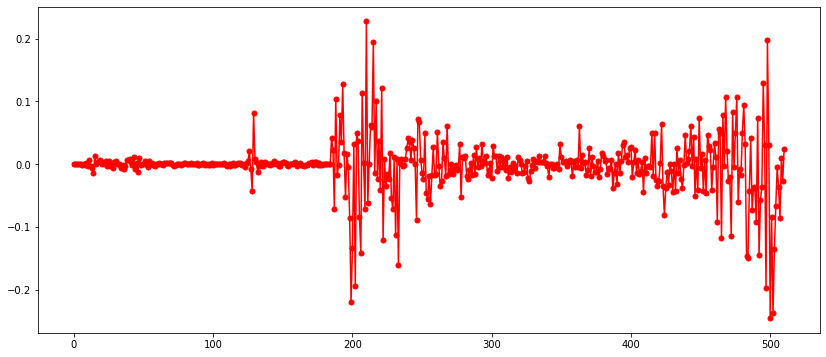

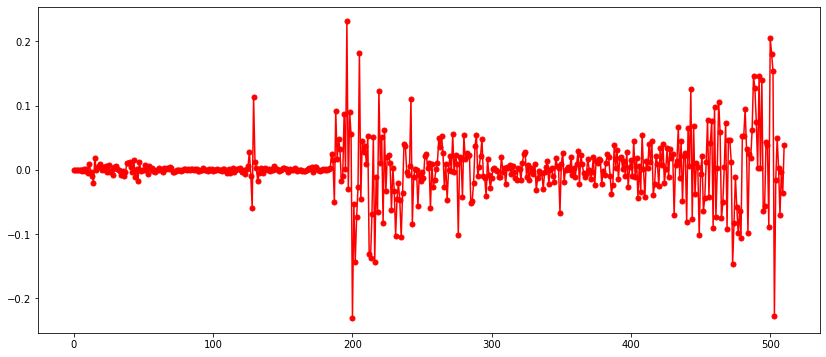

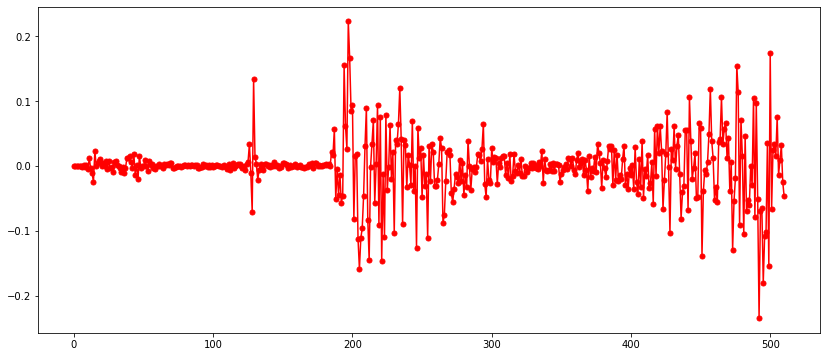

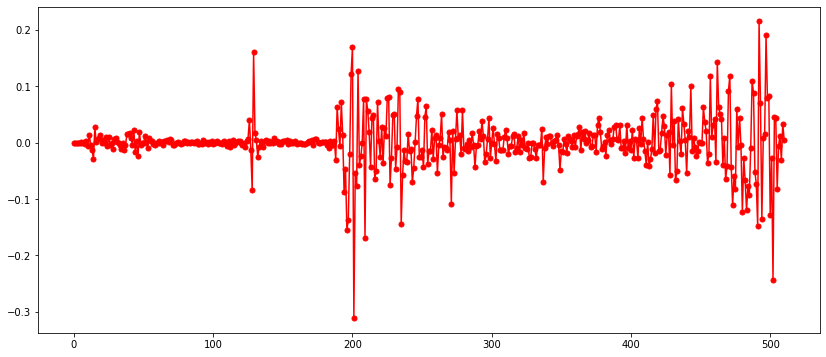

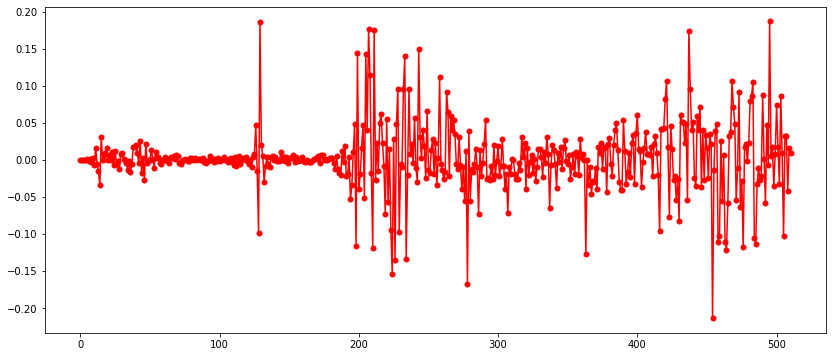

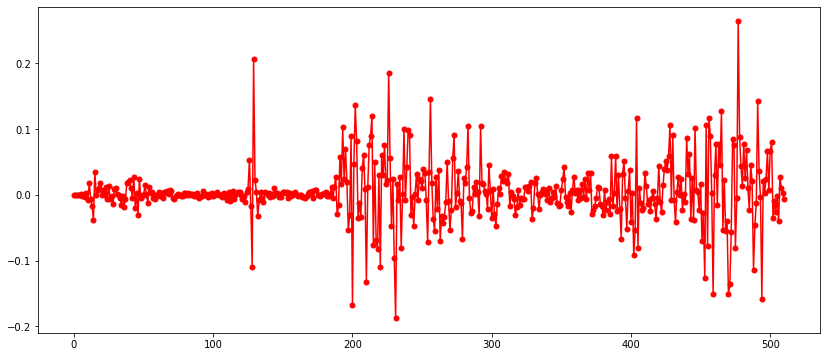

In [ ]:
for i in range(0, 16):

  plt.plot(eigenVectors[i],'r-o', markersize = 5)
  plt.show()

Compare to the first few PC plots, the rest of them have larger varaince of each element. They flactuate a lot in terms of the value along with dates.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [17]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
from sklearn.metrics import mean_squared_error
from math import sqrt
def plot_country_figures(original_df, country_name):
  #plot 1
  plt.plot(original_df.T[country_name], "ro")
  plt.grid(True)
  plt.xlabel(country_name)
  plt.show()

  #plot 2
  data_standard = scalar.fit_transform(original_df)
  df_standard = pd.DataFrame(data_standard, index = original_df.index, columns = original_df.columns)
  dfstand_cov = df_standard.cov()
  eigenValues_stand, eigenVectors_stand = get_sorted_eigen(dfstand_cov)
  PC_count = [1, 2, 4, 8, 16]
  for i in PC_count:
    W2 = eigenVectors_stand[:, 0:i]
    proj = np.dot(df_standard, W2)
    Recon_df_standard = np.dot(proj, W2.T)
    Recon_df= scalar.inverse_transform(Recon_df_standard)
    index = df.T.columns.get_loc(country_name)
    plt.plot(Recon_df[index], label = i)
    plt.legend()
  plt.show()

  #plot 3
  W3 = eigenVectors_stand[:, 0:16]
  proj = np.dot(df_standard, W3)
  Recon_df_standard_16 = np.dot(proj, W3.T)
  Recon_df_16= scalar.inverse_transform(Recon_df_standard_16)
  Recon_df_1 = pd.DataFrame(Recon_df_16, index = original_df.index, columns = original_df.columns)
  residual = original_df - Recon_df_1
  plt.plot(residual.T[country_name])
  plt.show()

  #plot 4
  rmse_list = []
  for m in range(1, 11):
    W4 = eigenVectors_stand[:, 0:m]
    proj = np.dot(df_standard, W4)
    Recon_df_standard = np.dot(proj, W4.T)
    Recon_df= scalar.inverse_transform(Recon_df_standard)
    index = df.T.columns.get_loc(country_name)
    rmse = sqrt(mean_squared_error(df.T[country_name], Recon_df[index]))
    rmse_list.append(rmse)
  x = np.arange(1, 11)
  y = rmse_list
  plt.plot(x, y, "g" )
  plt.grid(True)
  plt.show()



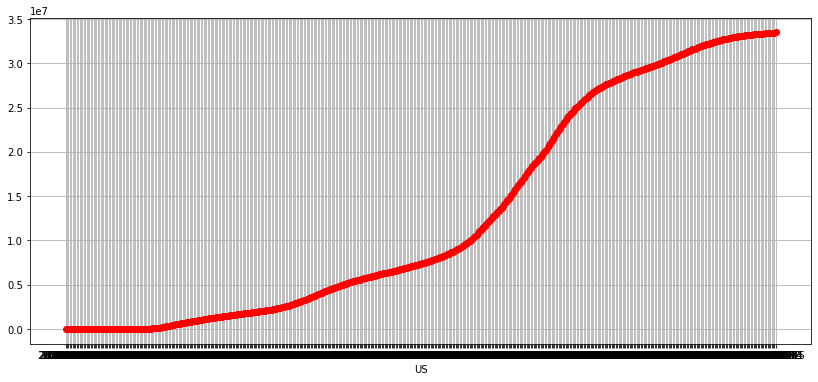

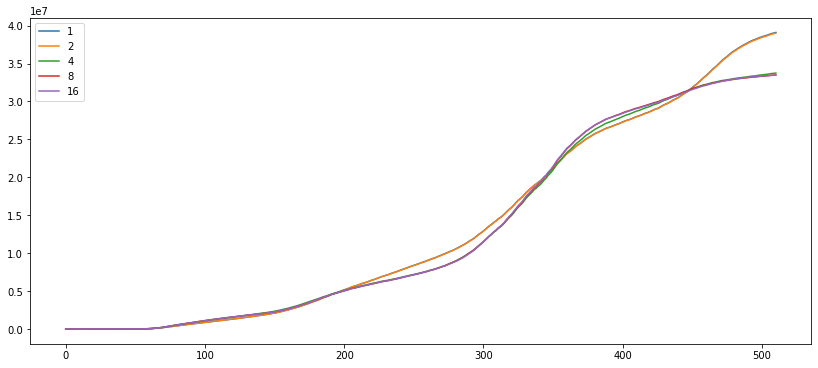

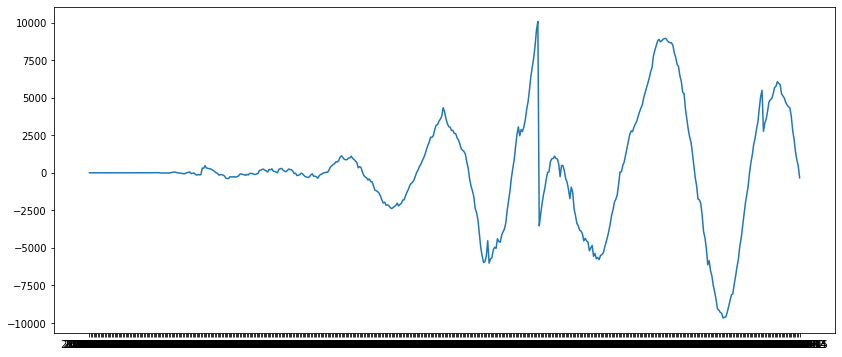

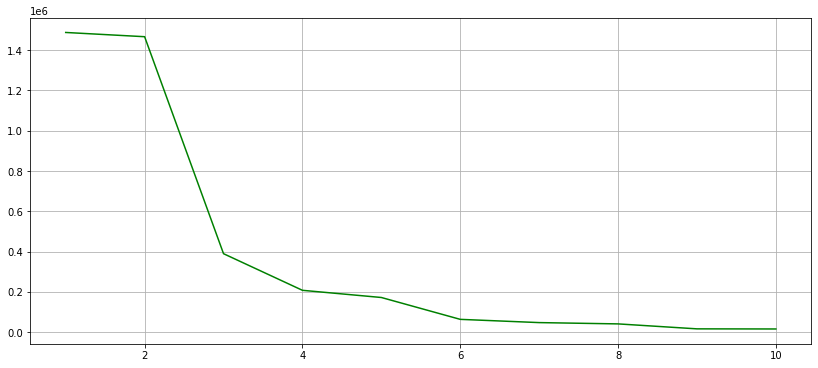

In [ ]:
plot_country_figures(df, "US")

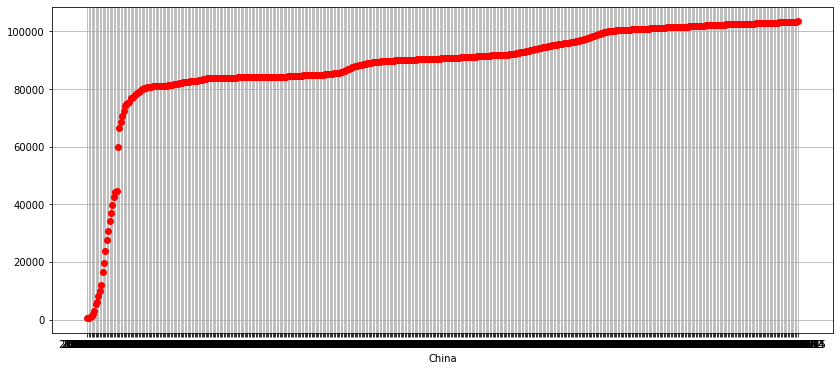

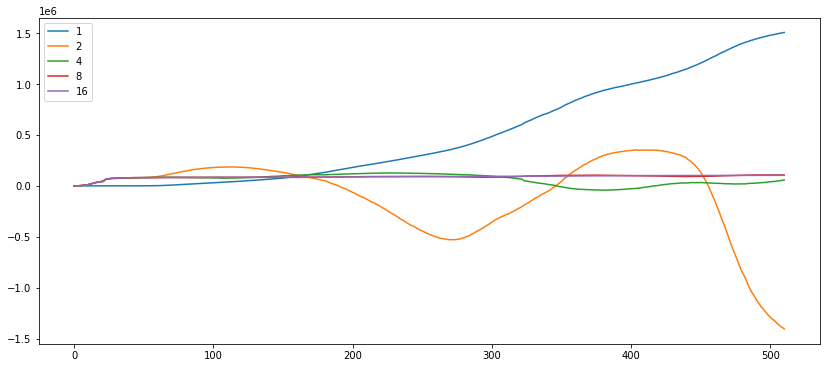

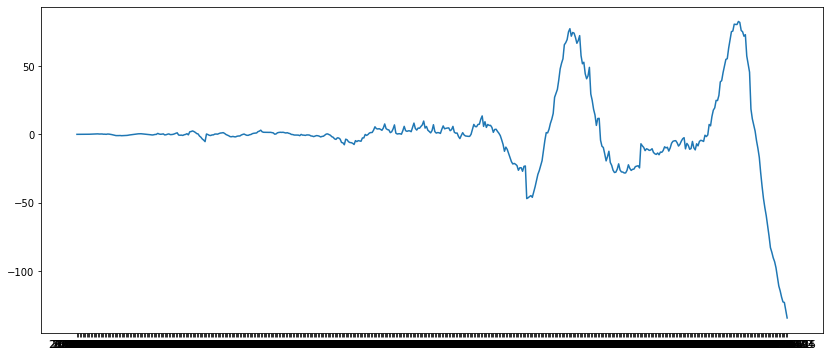

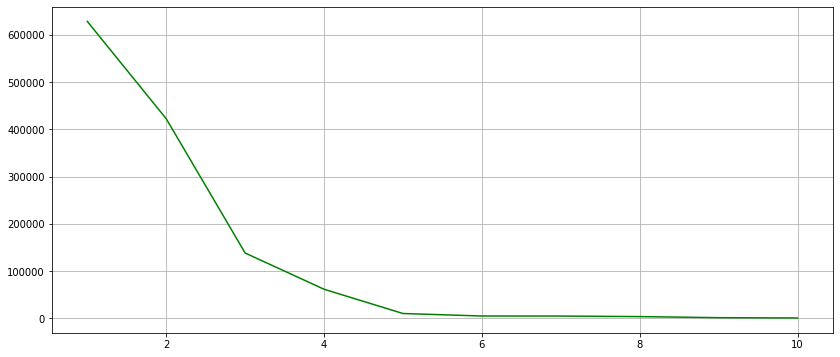

In [ ]:
plot_country_figures(df, "China")

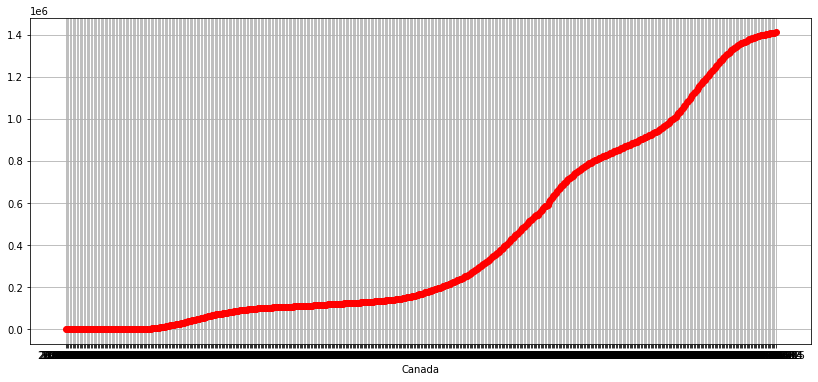

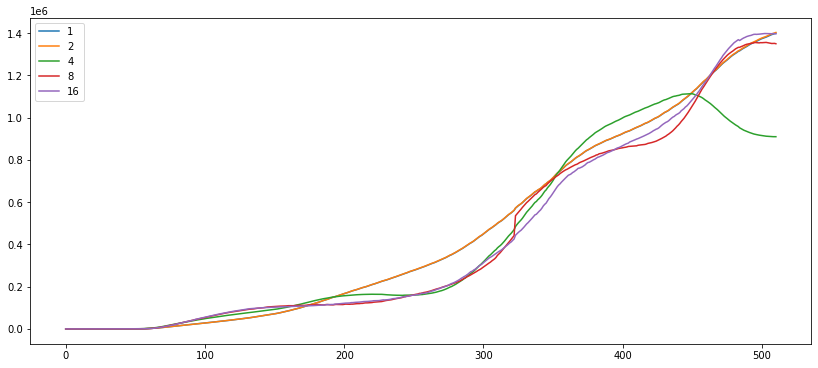

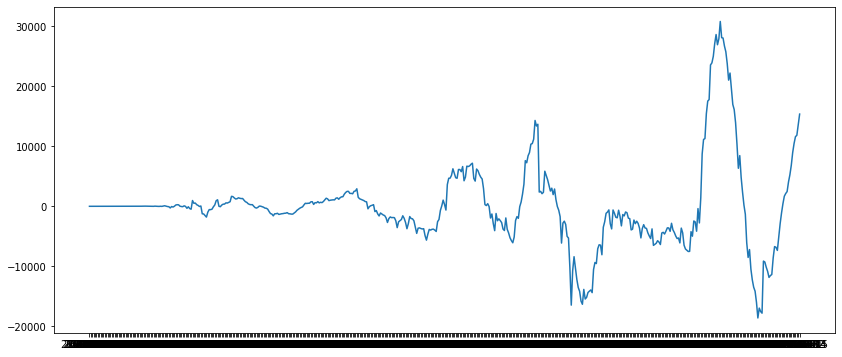

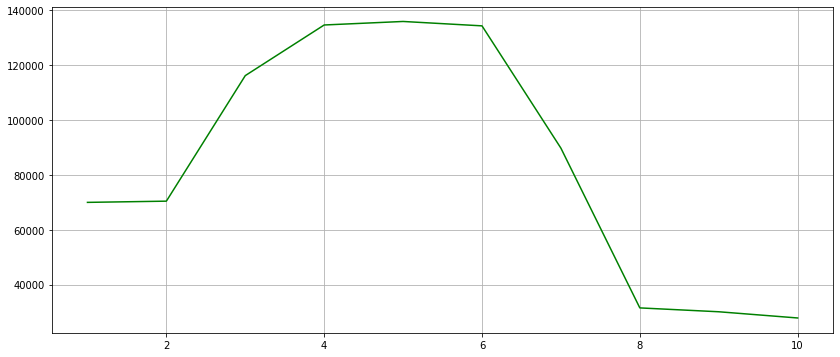

In [ ]:
plot_country_figures(df, "Canada")

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [61]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
from sklearn.metrics import mean_squared_error
from math import sqrt
def plot_country_figures_SVD(original_df, country_name):
  #plot 1
  plt.plot(original_df.T[country_name], "ro")
  plt.grid(True)
  plt.xlabel(country_name)
  plt.title("Original Country Data")
  #plt.locator_params(axis="x", nbins=10)
  plt.show()

  #plot 2
  data_standard = scalar.fit_transform(original_df)
  df_standard = pd.DataFrame(data_standard, index = original_df.index, columns = original_df.columns)
  U, S, V = np.linalg.svd(df_standard, full_matrices = False)
  SVD_count = [1, 2, 4, 8, 16]
  for i in SVD_count:
    ui = U[:, 0:i]
    vi = V[0:i, :]
    Ai = S[0:i]*ui@vi
    Recon_Ai = scalar.inverse_transform(Ai)
    index = df.T.columns.get_loc(country_name)
    plt.plot(Recon_Ai[index], label = i)
    plt.legend()
  plt.title("SVD Reconstruction")
  plt.show()

  #plot 3
  u16 = U[:, 0:16]
  v16 = V[0:16, :]
  A16 = S[0:16]*u16@v16
  Recon_Ai_16= scalar.inverse_transform(A16)
  Recon_Ai_16 = pd.DataFrame(Recon_Ai_16, index = original_df.index, columns = original_df.columns)
  residual = original_df - Recon_Ai_16
  plt.plot(residual.T[country_name])
  plt.title("Residual Error")
  plt.show()

 #plot 4
  rmse_list = []
  for j in range(1, 11):
    uj = U[:, 0:j]
    vj = V[0:j, :]
    Aj = S[0:j]*uj@vj
    Recon_Aj= scalar.inverse_transform(Aj)
    index = original_df.T.columns.get_loc(country_name)
    rmse = sqrt(mean_squared_error(original_df.T[country_name], Recon_Aj[index]))
    rmse_list.append(rmse)
  x = np.arange(1, 11)
  y = rmse_list
  plt.plot(x, y, "g" )
  plt.title("RMSE")
  plt.grid(True)
  plt.show()

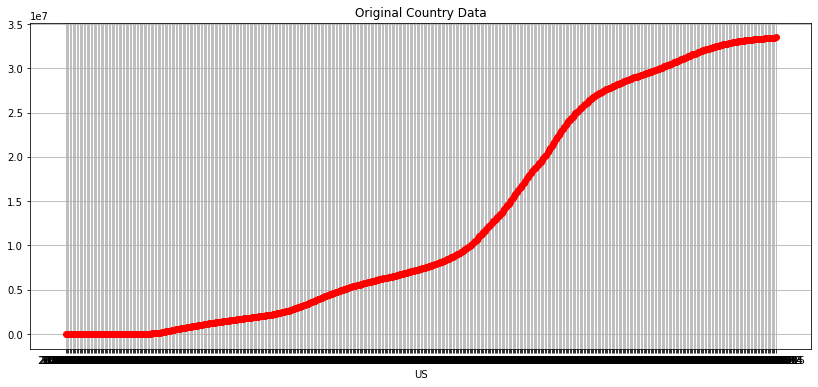

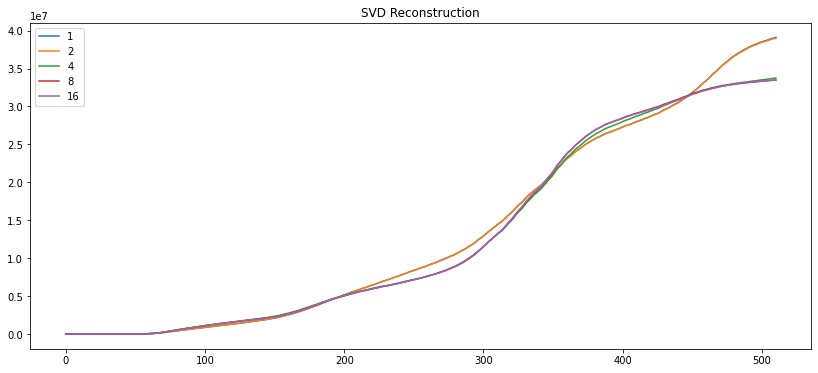

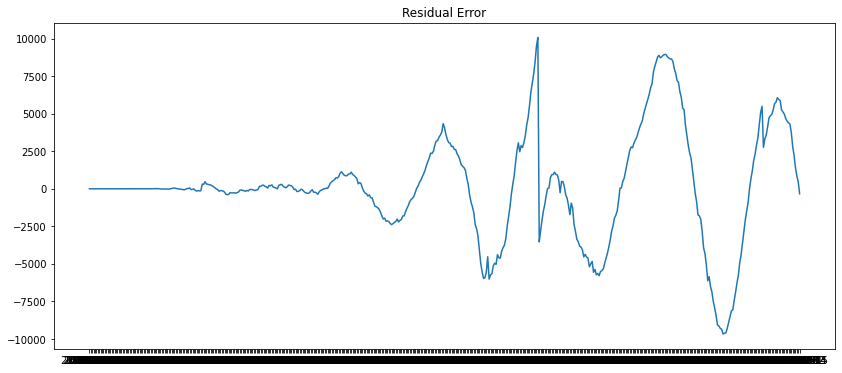

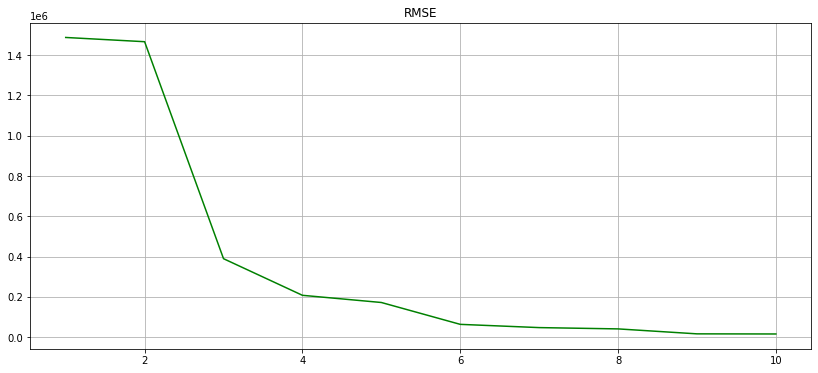

In [62]:
plot_country_figures_SVD(df, "US")

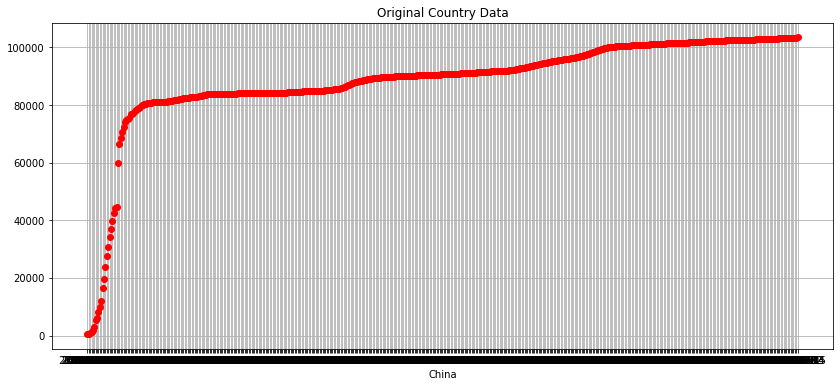

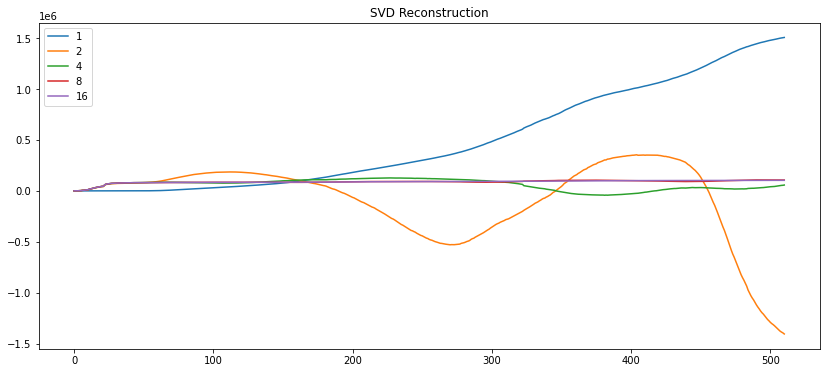

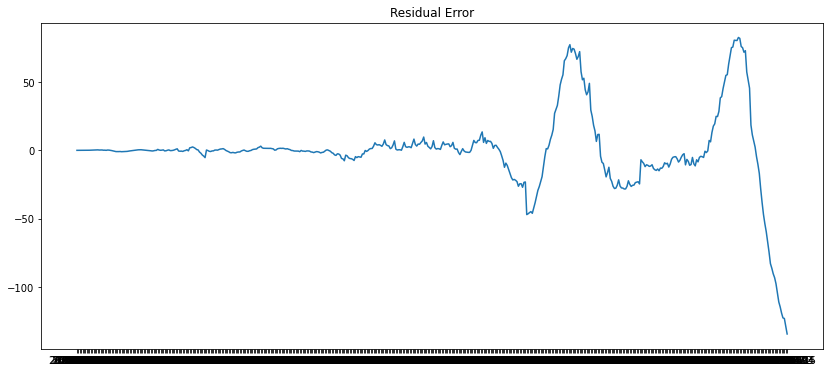

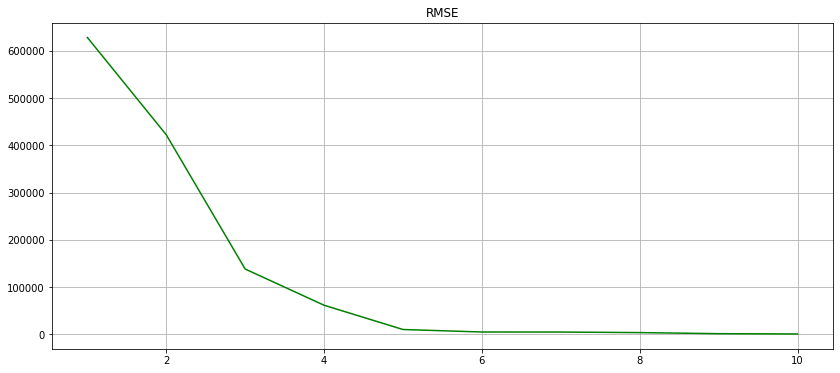

In [36]:
plot_country_figures_SVD(df, "China")

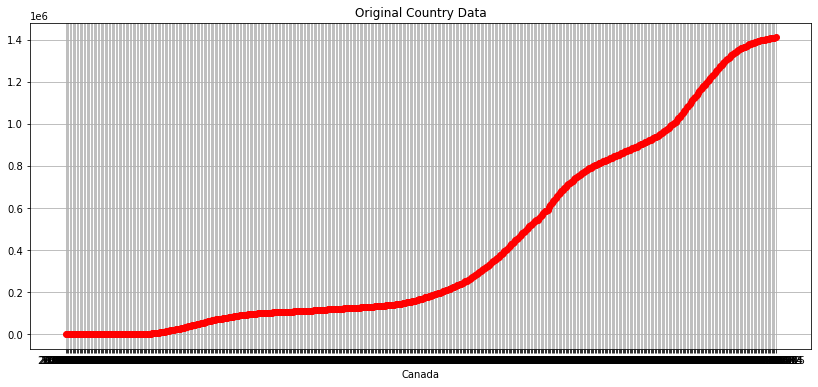

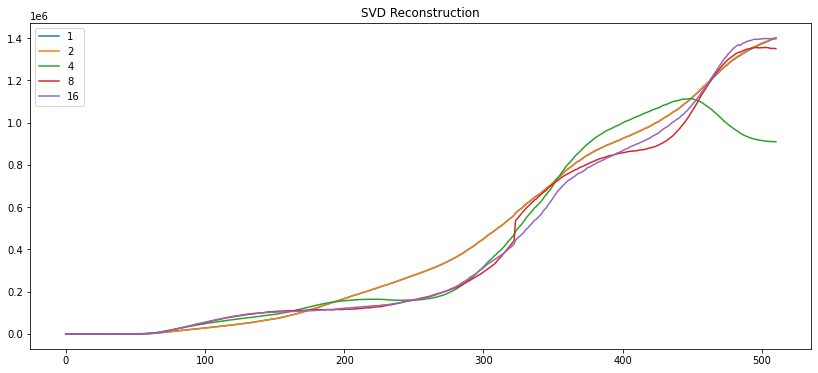

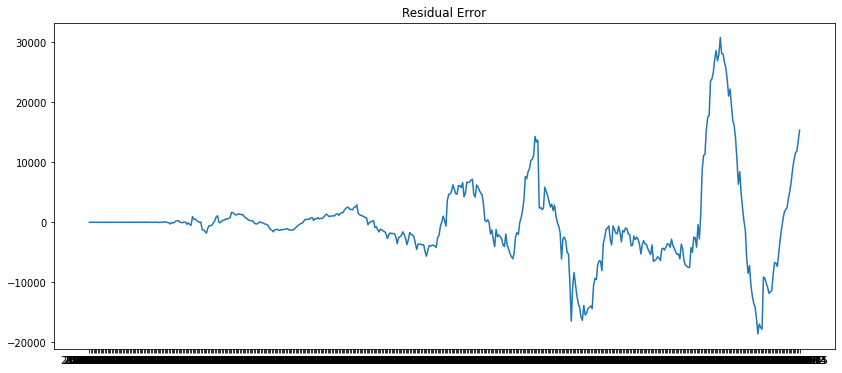

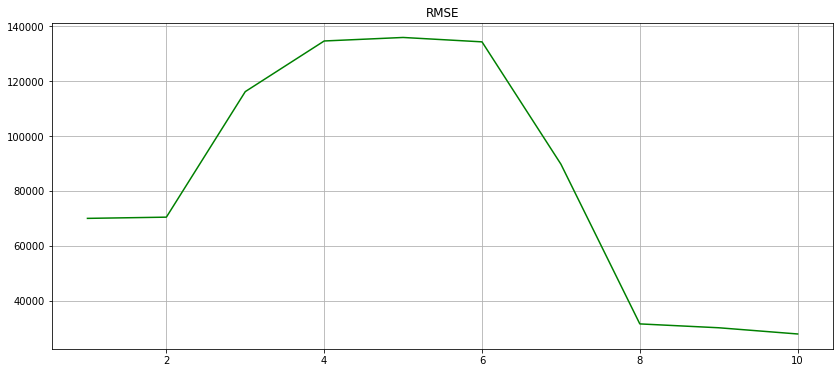

In [37]:
plot_country_figures_SVD(df, "Canada")

Standardization is required for SVD. If the data is not standardized, the patterns may be too specific or extreme to the samples with higher values. The results of PCA and SVD are the same.

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [50]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving new_data.csv to new_data.csv


In [51]:
import pandas as pd
new_data = pd.read_csv('new_data.csv',
    index_col=0,
    thousands=','
)

In [52]:
new_data.drop(['Grand Total'],axis=1, inplace=True)
new_data

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
Row Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,392452,394683,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8830,8861,8891,8934,8988,9016,9039,9067,9111,9139,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467,9495,9512,9526,9556,9575,9596,9635,9650,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,208715,208778,208829,208857,208867,208912,209002,209046,209114,209142,209163,209172,209199,209248,209283,209315,209336,209347,209353,209396,209411,2

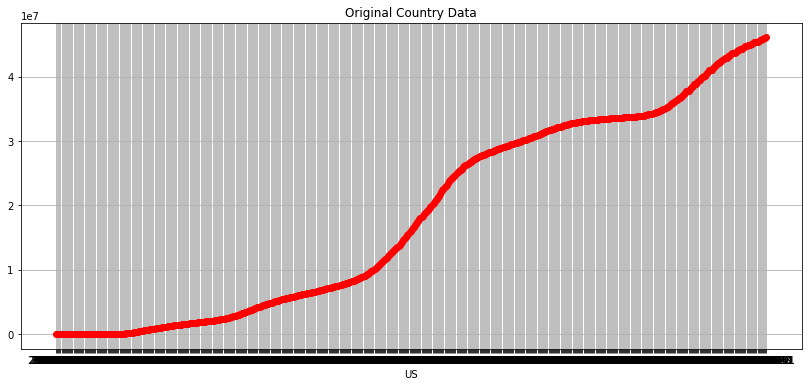

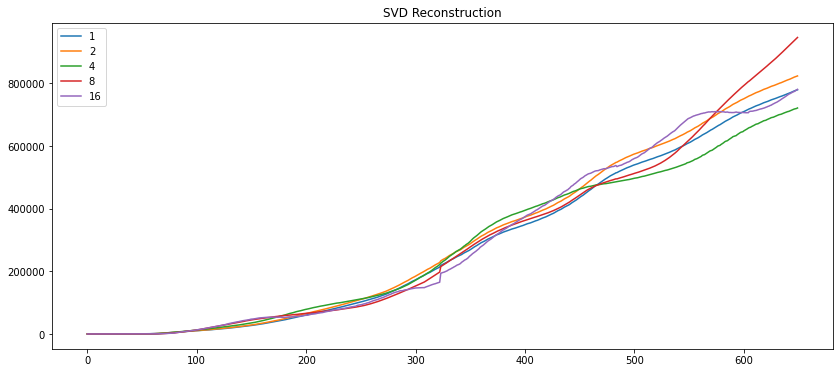

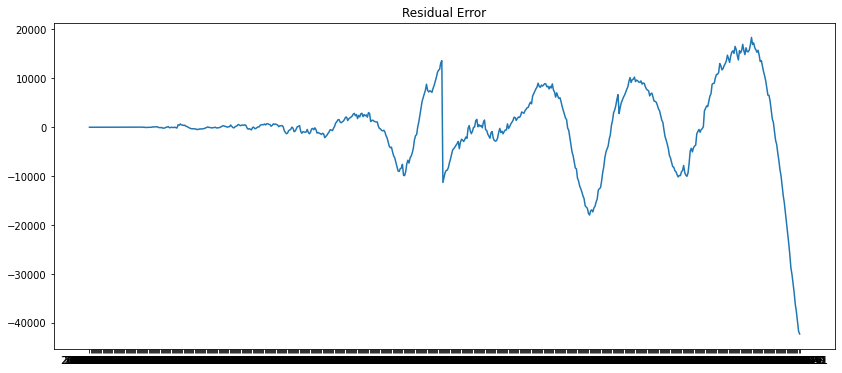

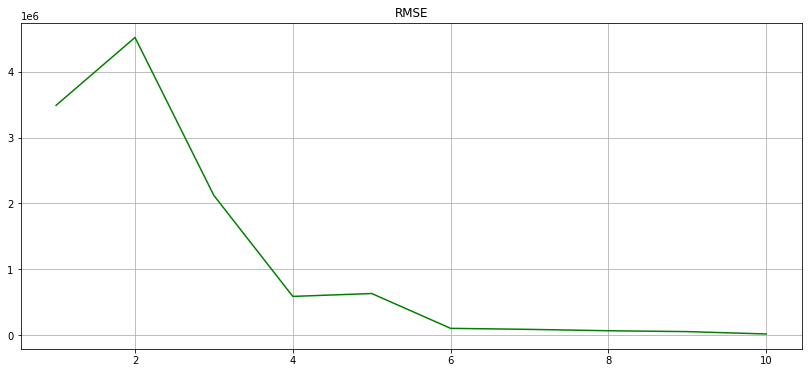

In [58]:
plot_country_figures_SVD(new_data, "US")

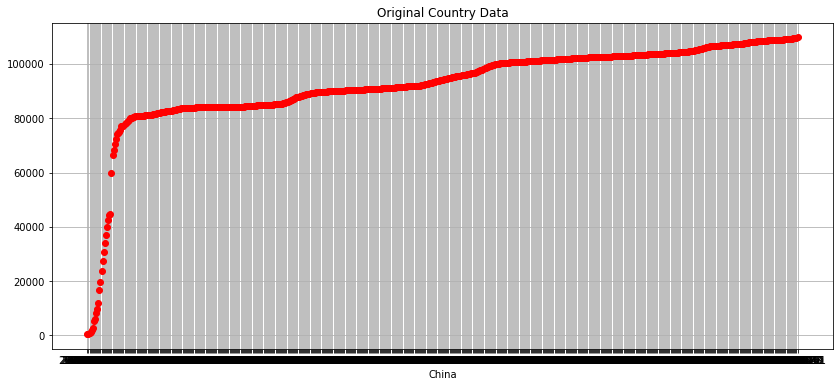

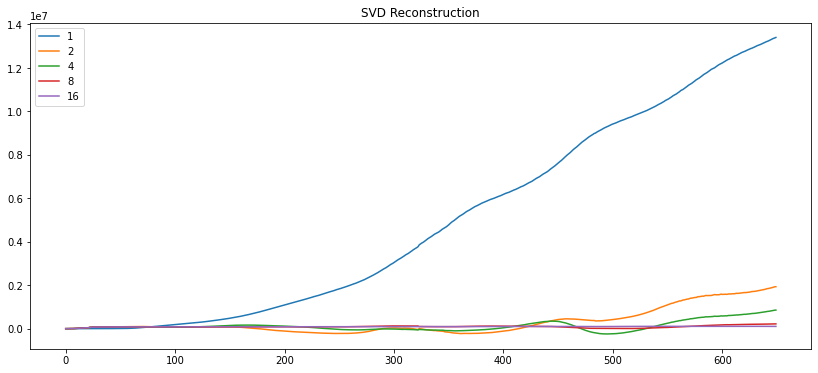

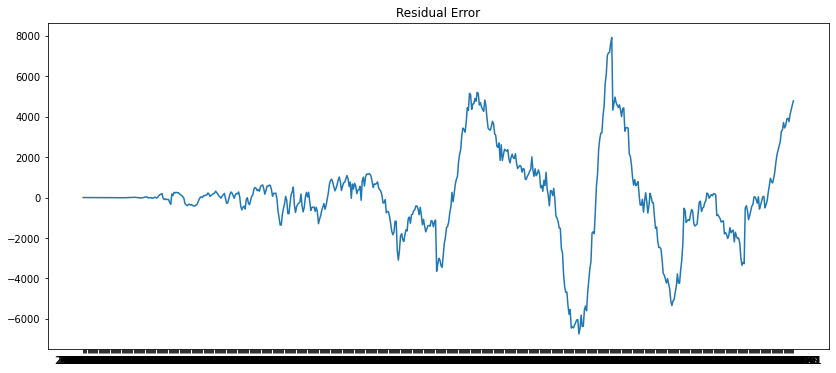

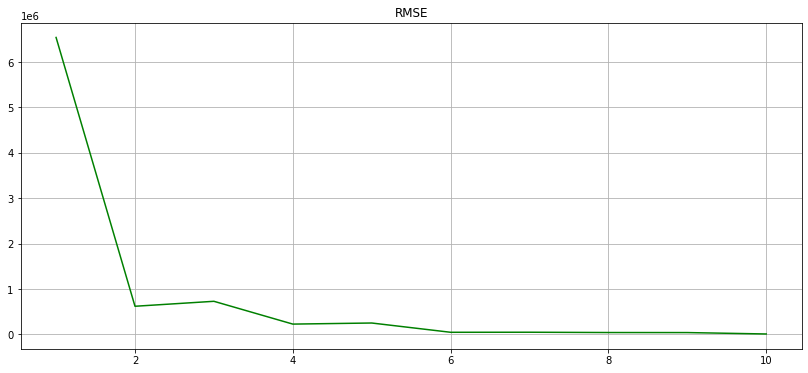

In [59]:
plot_country_figures_SVD(new_data, "China")

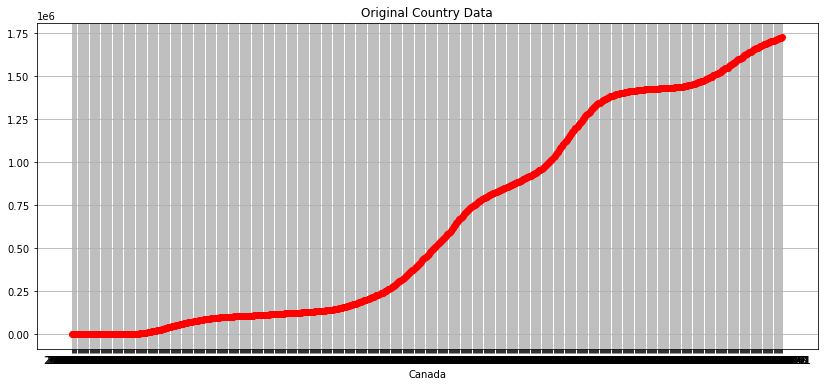

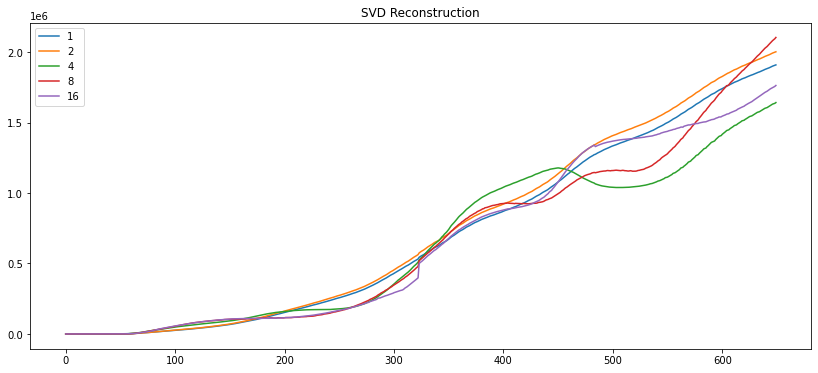

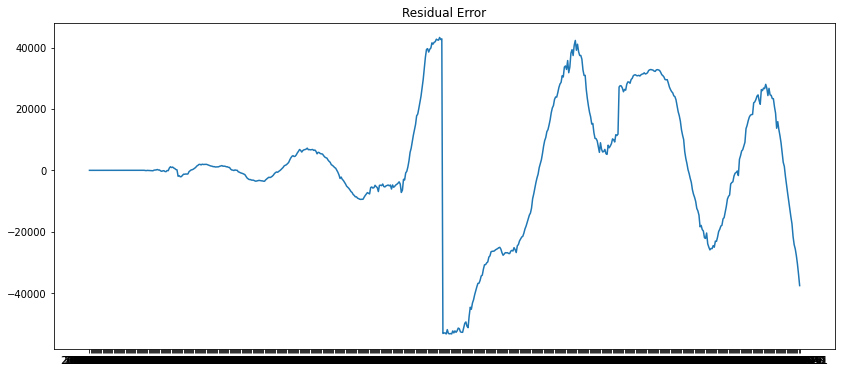

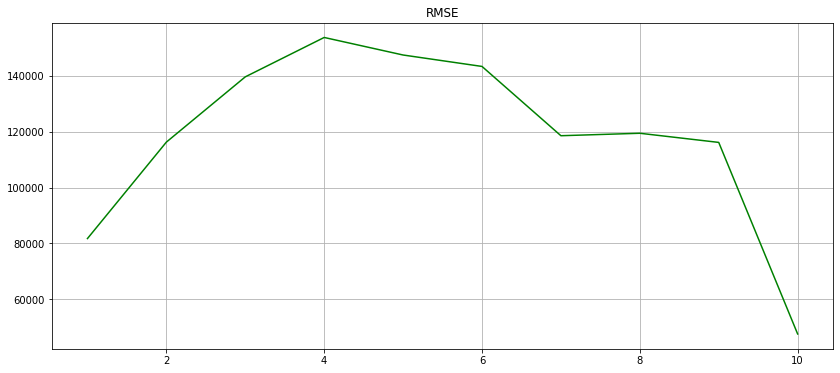

In [60]:
plot_country_figures_SVD(new_data, "Canada")

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

